# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 4/2/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 4/2/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,503,38928341,1.3
Albania,5820,2877800,202.2
Algeria,1459,43851043,3.3
Andorra,684,77265,885.3
Angola,825,32866268,2.5
Antigua and Barbuda,141,97928,144.0
Argentina,138240,45195777,305.9
Armenia,12796,2963234,431.8
Australia,149,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
San Marino,447,33938,1317.1
Hungary,120937,9660350,1251.9
Estonia,15638,1326539,1178.9
Poland,377267,37846605,996.8
Jordan,101372,10203140,993.5
Uruguay,33167,3473727,954.8
Czechia,96169,10708982,898.0
Montenegro,5624,628062,895.5
Andorra,684,77265,885.3


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/29/21    2794949.0
3/30/21    2818630.0
3/31/21    2843644.0
4/1/21     2866323.0
4/2/21     2882356.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/20/21        NaN
3/21/21      768.0
3/22/21     8261.0
3/23/21    20969.0
3/24/21    23757.0
3/25/21    21620.0
3/26/21    20689.0
3/27/21    17628.0
3/28/21     1727.0
3/29/21    10297.0
3/30/21    23681.0
3/31/21    25014.0
4/1/21     22679.0
4/2/21     16033.0
Name: Germany, dtype: float64

<AxesSubplot:>

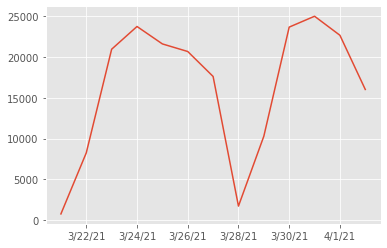

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

254.37212344202698